# Encontro 22: Mundos Pequenos

Importando as bibliotecas:

In [3]:
import sys
sys.path.append('..')

import socnet as sn
import matplotlib.pyplot as plt

%matplotlib inline  

## Início da Atividade 1

Definindo uma função que gera um grafo aleatório tal que a probabilidade de uma aresta existir é `c` sobre o número de nós:

In [4]:
from random import random

def generate_random_graph(num_nodes, c):
    g = sn.generate_empty_graph(num_nodes)

    nodes = list(g.nodes)

    for i in range(num_nodes):
        n = nodes[i]

        for j in range(i + 1, num_nodes):
            m = nodes[j]

            if random() < c / num_nodes:
                g.add_edge(n, m)

    return g

Gerando um grafo passando parâmetros específicos para a função acima.

In [5]:
N = 100
C = 10

rg = generate_random_graph(N, C)

Verificando se a distribuição dos graus de `pg` segue uma Poisson com média `c`:

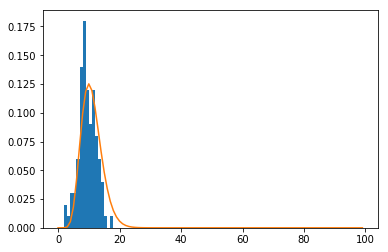

In [7]:
from scipy.stats import poisson


x = range(N)

plt.hist([rg.degree(n) for n in rg.nodes], x, normed=True)

plt.plot(x, poisson.pmf(C, x));

Calculando variação de *clustering coefficient* e *average distance* conforme aumentamos `num_nodes`:

In [8]:
x = []

rcc = []
rad = []

for num_nodes in range(C + 1, N):
    g = generate_random_graph(num_nodes, C)

    x.append(num_nodes)

    rcc.append(sn.average_clustering_coefficient(g))
    rad.append(sn.average_distance(g))

Plotando variação de *clustering coefficient*:

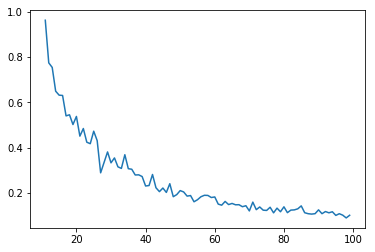

In [9]:
plt.plot(x, rcc);

Plotando variação de *average distance*:

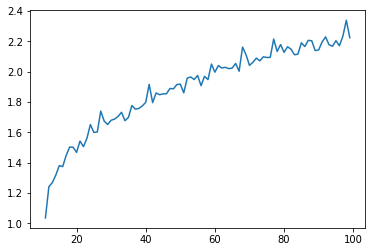

In [10]:
plt.plot(x, rad);

## Início da Atividade 2

Definindo uma função que gera um grafo circular:

In [11]:
def generate_circular_graph(num_nodes, c):
    g = sn.generate_empty_graph(num_nodes)

    nodes = list(g.nodes)

    for i in range(num_nodes):
        n = nodes[i]

        for delta in range(1, c // 2 + 1):
            j = (i + delta) % num_nodes

            m = nodes[j]

            g.add_edge(n, m)

    return g

Calculando variação de *clustering coefficient* e *average distance* conforme aumentamos `num_nodes`:

In [12]:
ccc = []
cad = []

for num_nodes in x:
    g = generate_circular_graph(num_nodes, C)

    ccc.append(sn.average_clustering_coefficient(g))
    cad.append(sn.average_distance(g))

Plotando variação de *clustering coefficient*:

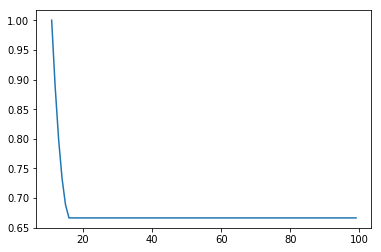

In [13]:
plt.plot(x, ccc);

Plotando variação de *average distance*:

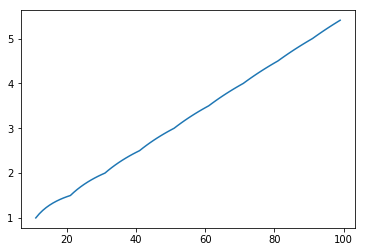

In [14]:
plt.plot(x, cad);

## Início da Atividade 3

Definindo uma função que gera um grafo híbrido:

In [15]:
from random import choice, randint


def redo_edge(g, n, i):
    if g.number_of_nodes() <= 1:
        return
    
    g.remove_edge(n, i)
    
    while True:
        m = randint(0, g.number_of_nodes() - 1)  # nao escalavel
        if m != n:
            break
        
    g.add_edge(n, m)
    


def generate_hybrid_graph(num_nodes, c, p):
    g = generate_circular_graph(num_nodes, c)

    for n in g.nodes:
        non_neighbors = set(g.nodes)

        for m in g.neighbors(n):
            non_neighbors.remove(m)

        non_neighbors.remove(n)

        for m in list(g.neighbors(n)):
            if random() < p:
                g.remove_edge(n, m)

                non_neighbors.add(m)

                l = choice(list(non_neighbors))

                non_neighbors.remove(l)

                g.add_edge(n, l)

    return g

Os próximos gráficos serão para `N` e `C` fixos. Por conveniência, vamos repetir a definição.

In [16]:
N = 100
C = 10

Calculando variação de *clustering coefficient* e *average distance* conforme aumentamos `p`:

In [17]:
x = []

hcc = []
had = []

for ip in range(0, 11):
    p = ip / 10

    g = generate_hybrid_graph(N, C, p)

    x.append(p)

    hcc.append(sn.average_clustering_coefficient(g))
    had.append(sn.average_distance(g))

Comparando variação de *clustering coefficient* com o valor de referência do modelo aleatório.

Em um "pequeno mundo", espera-se um *clustering coefficient* acima desse valor de referência.

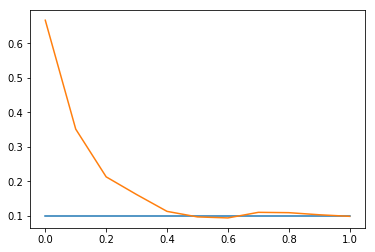

In [18]:
plt.plot(x, 11 * [C / N])
plt.plot(x, hcc);

Comparando variação de *average distance* com o valor de referência do modelo circular.

Em um "pequeno mundo", espera-se um *average distance* abaixo desse valor de referência.

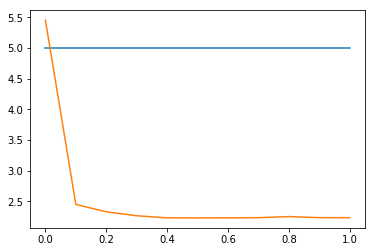

In [19]:
plt.plot(x, 11 * [N / (2 * C)])
plt.plot(x, had);

Para qual valor de `p` temos um "pequeno mundo"?

R: ~0.2

In [20]:
# escrita
def get_sessions(file_name):
    s = []
    with open(file_name, 'r') as fin:
        s = [line.strip() for line in fin.readlines()]
    return s


YEARS = range(1953, 1969)
graphs = [sn.load_graph('graphs/{}.gml'.format(y)) for y in YEARS]
sessions = [get_sessions('sessions/{}.txt'.format(y)) for y in YEARS]

In [21]:
musician_count = [g.number_of_nodes() for g in graphs]

def line_count(file_name):
    s = -1
    with open(file_name, 'r') as fin:
        s = sum(1 for _ in fin)
    return s

session_count = [len(line) for line in sessions]

In [22]:
session_count

[1028,
 1047,
 1128,
 1529,
 1548,
 1419,
 1310,
 1280,
 1261,
 1279,
 1111,
 1053,
 994,
 1021,
 913,
 927]

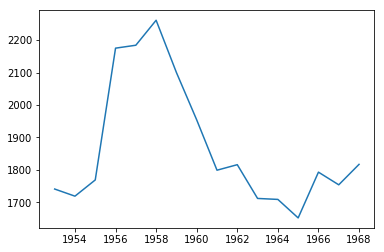

In [23]:
plt.plot(YEARS, musician_count)

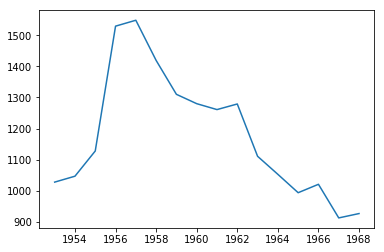

In [24]:
plt.plot(YEARS, session_count)

[19, 37, 31, 70, 67, 45, 57, 38, 68, 47, 37, 44, 37, 36, 100, 31]


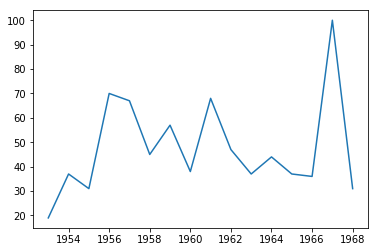

In [28]:
def gen_inovations():
    s = []
    with open('innovations.txt', 'r') as fin:
        s = [line.strip() for line in fin.readlines()]
    return s

def calc_innovations_per_year(innovations, sessions):
    ipy = [0] * len(sessions)  # innovations per year
    for innovation in innovations:
        for i, session in enumerate(sessions):
            if innovation in session:
                ipy[i] += 1
    return ipy
                
                
innovations = gen_inovations()
# innovations per year
ipy = calc_innovations_per_year(innovations, sessions)  
print(ipy)
plt.plot(YEARS, ipy)

[1.8482490272373542, 3.5339063992359123, 2.74822695035461, 4.578155657292348, 4.328165374677003, 3.171247357293869, 4.351145038167939, 2.96875, 5.392545598731166, 3.674745895230649, 3.3303330333033303, 4.178537511870846, 3.722334004024145, 3.525954946131244, 10.952902519167578, 3.344120819848975]


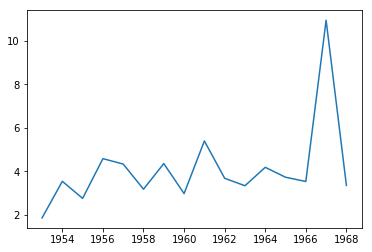

In [32]:
percent_ipy = [(i / j) * 100 for i, j in zip(ipy, session_count)]
print(percent_ipy)
plt.plot(YEARS, percent_ipy)


In [39]:
from numpy import std
from statistics import mean


def gen_degrees_stddev(g):
    degrees = []
    for n in g.nodes():
        d = g.degree(n)
        g.node[n]['degree'] = d
        degrees.append(d)
    return std(degrees), mean(degrees)

tmp = [gen_degrees_stddev(g) for g in graphs]

avg_deg = []
std_deg = []
for t in tmp:
    std_deg.append(t[0])
    avg_deg.append(t[1])

In [40]:
print(std_deg)

[17.346426408506943, 17.672815711241846, 19.334000051173309, 25.190205882457199, 22.609460381622078, 26.738246745202495, 24.543344027544855, 21.583861711977658, 21.469912156200241, 20.96269138557177, 21.40688705688526, 22.893037539370379, 20.029378255278839, 19.049969896698133, 21.062554814404294, 19.125801795969391]


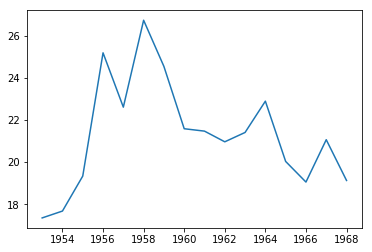

In [41]:
plt.plot(YEARS, std_deg)

In [43]:
import networkx as nx

from math import log

def smallworldness(g, avg_deg):
    # (cc / ccr) / (pl / plr)
    return (nx.average_clustering(g) / 
            (avg_deg / g.number_of_nodes())) / \
           (nx.average_shortest_path_length(g) / 
            (log(g.number_of_nodes()) / log(avg_deg)))
    

smallworlds = [smallworldness(g, a) for g, a in zip(graphs, avg_deg)]

In [44]:
smallworlds


[38.01406159354797,
 40.563431495276,
 39.690426970353755,
 41.6409599049018,
 44.06827183669375,
 43.962343285950936,
 42.603303059790896,
 42.597285581577495,
 42.855722498260015,
 40.707177177928585,
 39.71064875327975,
 36.7722159382058,
 37.48474183802207,
 42.06470434989561,
 35.05539802123462,
 41.414656486585166]

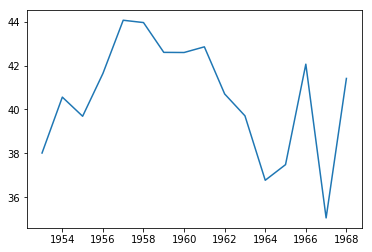

In [45]:
plt.plot(YEARS, smallworlds)